In [2]:
from PIL import Image
import matplotlib.pyplot as plt
import os
from PIL import Image
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import mahotas as mt
import pandas
path="F:/AMM2/Magnets/magnet_train_data/Magnets_train_23_01_2018/"
X=[]
y=[]
for directory in os.listdir(path):
    for file in os.listdir(path+directory):
        img=Image.open(path+directory+"/"+file)
        #print(path+directory+"/"+file, img)
        width, height = img.size
        for i in range(width):
            for j in range(height):
                #RGB =img.getpixel((i,j))
                #print(rgb)
                featurevector= img.getpixel((i,j))
                #print(featurevector)
        X.append(featurevector)
        if directory == "T1":
            label = 0
        if directory == "pore":
            label = 1
        if directory == "oxide":
            label = 2
        if directory == "Nd":
            label = 3
        if directory == "T2":
            label = 4
        if directory == "mixed":
            label = 5
        y.append(label)      

In [3]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
validation_size = 0.33
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,test_size=validation_size, random_state= 7)


In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [5]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.shape)

(75, 3)


In [82]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(activation='relu', alpha=0.01, batch_size='auto',hidden_layer_sizes=(300,300),max_iter=600)
nn.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(300, 300), learning_rate='constant',
       learning_rate_init=0.001, max_iter=600, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [7]:
predictions = nn.predict(X_test)

C:/b/T2/16009_165_1000x_HF_P1.jpg


C:\Users\69654\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


(0.6845323741007194, 0.0, 0.08014388489208633, 0.008273381294964029, 0.007074340527577938, 0.21997601918465226)


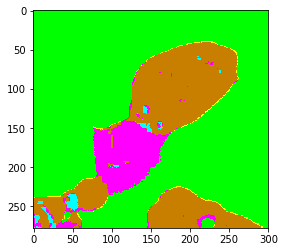

In [46]:
%matplotlib inline
from PIL import ImageFilter
from PIL import Image, ImageEnhance
path1="C:/b/"
classcolors = {5 : (200,127,0), 0 : (0,255,0), 1 : (0,0,255), 4 : (255,255,0), 3 : (0,255,255), 2 : (255,0,255), 6: (0,0,0)}
import numpy as np
for file in os.listdir(path1):
        print(path1+directory+"/"+file)
        img=Image.open(path1+"/"+file)
        width, height = img.size
        flatImg = np.array(img).reshape(-1,3)
        predictions = nn.predict(scaler.transform(flatImg))
        i=0
        for pred in predictions:
            flatImg[i] = classcolors[int(pred)]
            i=i+1
        flatImg = flatImg.reshape(height, width,3)
        img = Image.fromarray(flatImg.astype('uint8'), 'RGB')
        ee = relative_phase(img)
        print(ee)
img.save("C:/b/000.png")
plt.imshow(img)

In [291]:
%matplotlib inline
F=[]
path1="C:/b/"
for file in os.listdir(path1):
        print(path1+directory+"/"+file)
        img1=Image.open(path1+"/"+file)
        width1, height1 = img1.size
        featurevector = scaler.transform(img1.getdata())
        prob = nn.predict_proba(featurevector)
        d = np.array(prob).reshape(6,width1,height1)

C:/b/T2/16009_165_1000x_HF_P1.jpg


In [292]:
a = d[0,:,:]

In [293]:
a.shape

(300, 278)

In [295]:
#a = d[6]
a[a == 0.99] = 255
a[a == 0.10] = 0
scipy.misc.imsave("C:/b/c6.jpg", a)
#a = np.array(a).reshape(-1)